<a href="https://colab.research.google.com/github/lisosoma/BI-statistics/blob/main/bi_hw2_11_add.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as sts
import scipy
import seaborn as sns
import scipy.optimize as opt
from scipy.optimize import fmin
import seaborn as sns

### Задача 3 (дополнение) 

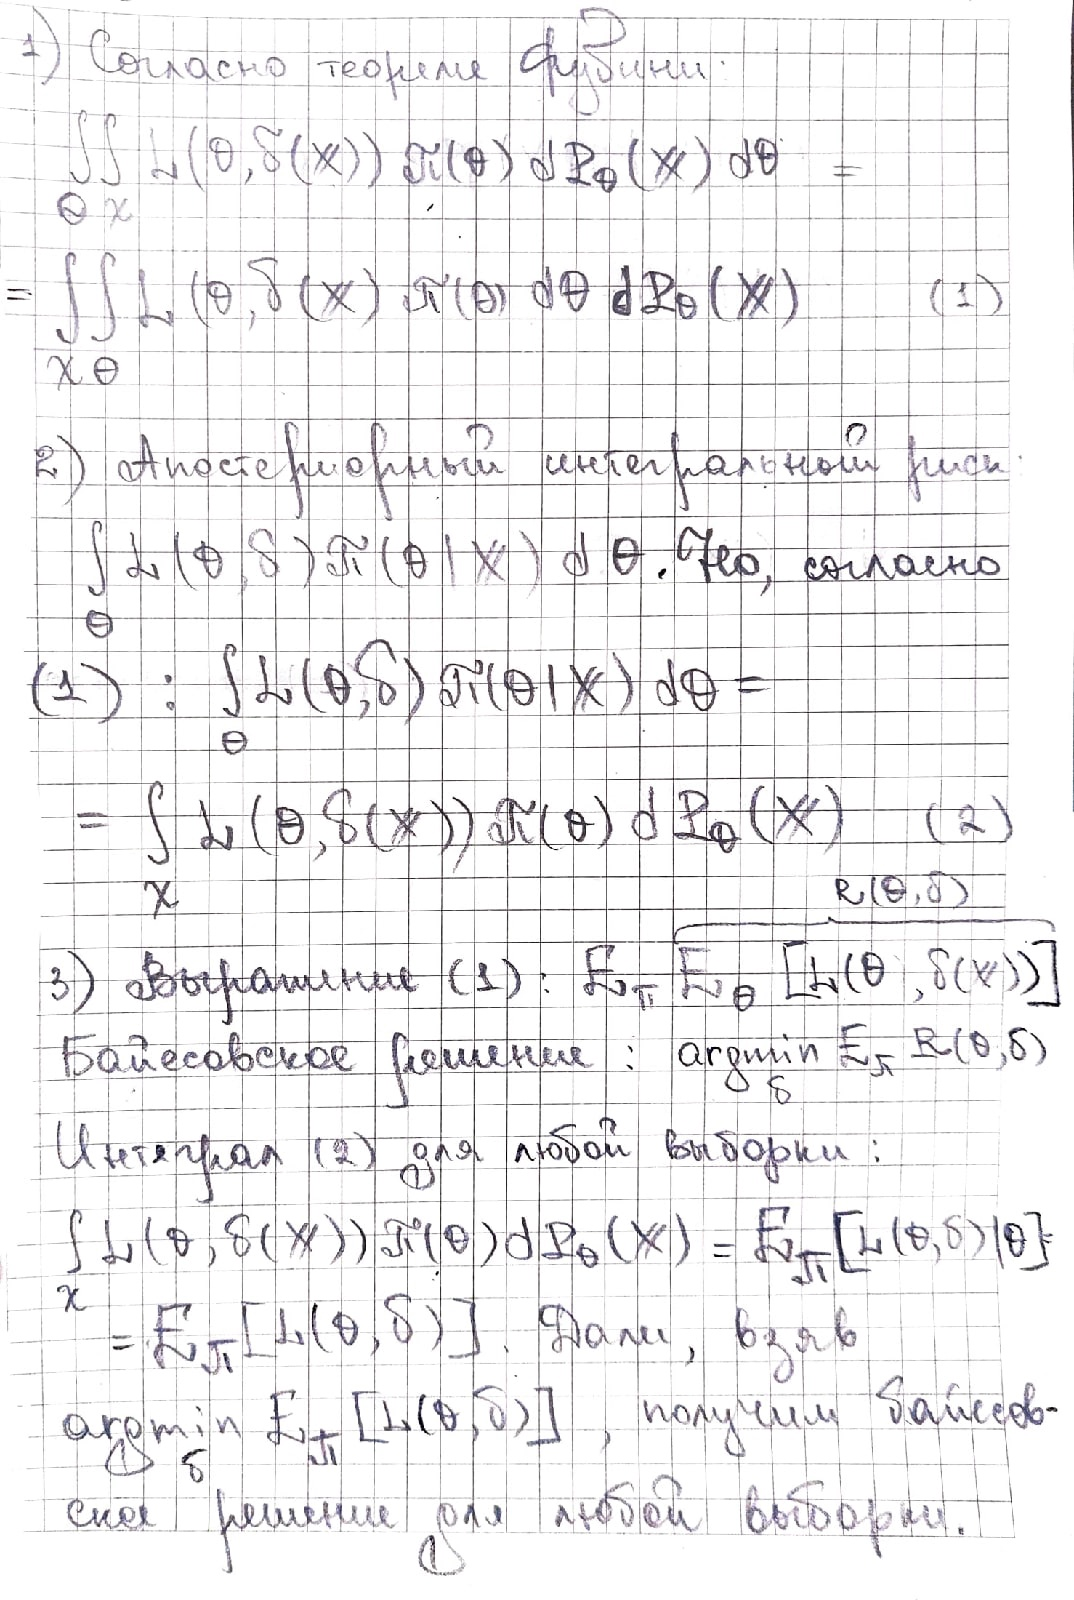

### Задача 5

$Θ_0 = (0.5, +∞)$
 - "0-1"-потери: $\mathcal{D} = \{0, 1\}$
  - $\mathcal{L} = 1 - \delta$, $\theta > 0.5$
  - $\mathcal{L} = \delta$, $\theta \leq 0.5$
  - байесовское решение в данном случае:
    - $\delta = 1, P(θ ∈ Θ_0|X) > P(θ ∉ Θ_0|X)$
    - $\delta = 0, P(θ ∈ Θ_0|X) \leq P(θ ∉ Θ_0|X)$
    
 - "0-1-2"-потери: $\mathcal{D} = \{0, 2\}$
    - $\mathcal{L} = 2 - \delta$, $\hat\theta \leq 0.5| \theta > 0.5$
    - $\mathcal{L} = |1 - \delta|$, $\hat\theta > 0.5| \theta \leq 0.5$
    - $\mathcal{L} = \delta$, $\hat\theta \leq 0.5| \theta \leq 0.5 \  или \ \hat\theta > 0.5 | \theta > 0.5$
    - обозначим $P_1 = P(\hat\theta \leq 0.5| \theta > 0.5)$, $P_2 = P(\hat\theta > 0.5| \theta \leq 0.5)$ и $P_3 = P(\hat\theta \leq 0.5| \theta \leq 0.5 \  или \ \hat\theta > 0.5 | \theta > 0.5)$.
    - апостериорный интегральный риск $\delta P_1 + |1 - δ|P_2 + (2 - \delta)P_3$, его производная равна $P_1 - sign(1 - δ)P_2 -P_3$, тогда точка экстремума $\frac{P_1 -P_3}{P_2} = sign(1 - δ)$
    - баейсовское решение в данном случае:
      - $\delta = 2, \frac{P_1 -P_3}{P_2} < 0$
      - $\delta = 0, \frac{P_1 -P_3}{P_2} > 0$

In [ ]:
def sample_generate(theta):
    return sts.binom.rvs(n = 3, p = theta, size = 10)


def theta_generate(n):
    return sts.beta.rvs(a = 3, b = 3, size = n)

In [ ]:
def loss_test1(sample, theta):
    s = np.sum(sample)
    n = 3 * 10
    posteriori1 = sts.binom.cdf(k = s, n = n, p = theta) * sts.beta.cdf(x = theta, a = 3, b = 3) / scipy.special.beta(3 + s, 3 + n - s) / scipy.special.binom(n, np.sum(sample))
    posteriori2 = sts.binom.cdf(k = s, n = n, p = 1 - theta) * sts.beta.cdf(x = 1 - theta, a = 3, b = 3) / scipy.special.beta(3 + s, 3 + n - s) / scipy.special.binom(n, np.sum(sample))
    if theta > 0.5:
        if posteriori1 > posteriori2:
            return 1
        else: 
            return 0
    if theta <= 0.5:
        if posteriori1 > posteriori2:
            return 0
        else: 
            return 1

In [ ]:
n = np.linspace(10, 1000, 100, dtype = int, endpoint = True)
p = []
for k in n:
    thetas = theta_generate(k)
    samples = np.array([sample_generate(theta) for theta in thetas])
    delta1 = np.array([loss_test1(sample, theta) for sample, theta in zip(samples, thetas)])
    TN1 = (set(np.where(delta1 == 1)[0]) | set(np.where(thetas > 0.5)[0])) - (set(np.where(delta1 == 1)[0]) & set(np.where(thetas > 0.5)[0]))
    FN1 = (set(np.where(delta1 == 0)[0]) | set(np.where(thetas <= 0.5)[0])) - (set(np.where(delta1 == 1)[0]) & set(np.where(thetas <= 0.5)[0]))
    p.append((len(TN1) + len(FN1)) / k / 2)

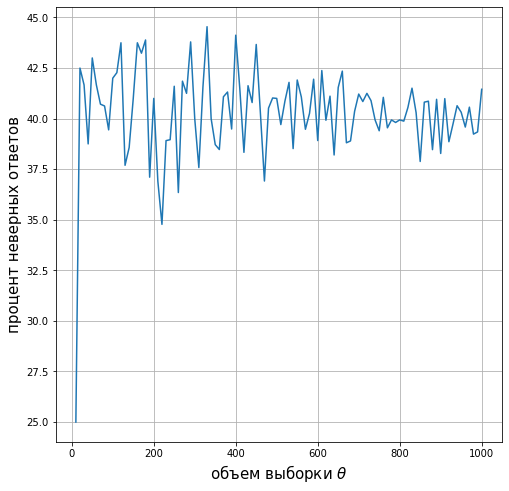

In [ ]:
plt.figure(figsize = (8, 8))
plt.xlabel(fr'объем выборки $\theta$', size = 15)
plt.ylabel('процент неверных ответов', size = 15)
plt.plot(n , np.array(p) * 100)
plt.grid()
plt.show()